# Importações

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

from tensorflow.image import resize
from tensorflow.keras.models import load_model

from sklearn.metrics import accuracy_score

# Carregando o Modelo e as Imagens

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
model = load_model(os.path.join('/content/gdrive/MyDrive/Dog_Breeds_Classification/model', 'best_model.h5'))

In [4]:
data_dir = '/content/gdrive/MyDrive/Dog_Breeds_Classification/cell_phone_images'

In [5]:
for dog in os.listdir(data_dir):
  count_img = 0
  for img_dog in os.listdir(os.path.join(data_dir, dog)):
    count_img += 1
  print(f'\nQuantidade de imagens do(a) {dog}: {count_img}')


Quantidade de imagens do(a) Aruska - german_shepherd: 10

Quantidade de imagens do(a) Charlote - shih_tzu: 28


# Previsões do Modelo em Imagens Coletadas Pelo Celular

## Aruska
- Raça german_shepherd

In [8]:
# pegando o diretorio do cachorro escolhido
dog_dir = '/content/gdrive/MyDrive/Dog_Breeds_Classification/cell_phone_images/Aruska - german_shepherd'

In [9]:
# coletando as previsões feitas pelo modelo em cima das imagens do cachorro
preds = []
for img_path in os.listdir(dog_dir):
  img = cv2.imread(os.path.join(dog_dir, img_path))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resize = resize(img, (224, 224)).numpy().astype(float) / 255

  pred = model.predict(np.expand_dims(img_resize, 0)).argmax()
  preds.append(pred)

1/1 [==============================] - 0s 257ms/step


In [10]:
# checando a acurácia do modelo nessas imagens
dog_class = [6] * 10

print(accuracy_score(dog_class, preds))

0.9


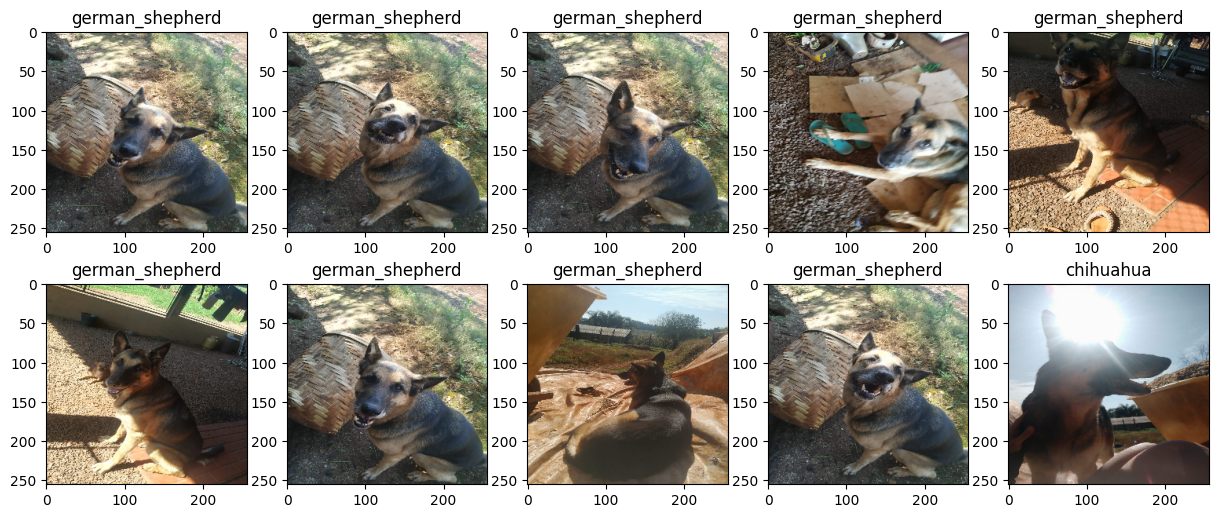

In [11]:
# apresentando as imagens junto com a classificação feita pelo modelo
class_names = ["beagle", "boxer", "chihuahua", "corgi", "dachshund", "french_bulldog", "german_shepherd",
                "golden_retriever", "husky", "pomeranian", "poodle", "pug", "rottweiler", "shiba_inu", "shih_tzu", "yorkshire_terrier"]

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for idx, img_path in enumerate(os.listdir(dog_dir)):
  img = cv2.imread(os.path.join(dog_dir, img_path))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resize = resize(img, (256, 256)).numpy().astype(int)

  row = idx // 5
  col = idx % 5

  ax[row, col].imshow(img_resize)
  ax[row, col].title.set_text(class_names[preds[idx]])

## Charlote
- Raça shih_tzu

In [12]:
# pegando o diretorio do cachorro escolhido
dog_dir = '/content/gdrive/MyDrive/Dog_Breeds_Classification/cell_phone_images/Charlote - shih_tzu'

In [13]:
# coletando as previsões feitas pelo modelo em cima das imagens do cachorro
preds = []
for img_path in os.listdir(dog_dir):
  img = cv2.imread(os.path.join(dog_dir, img_path))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resize = resize(img, (224, 224)).numpy().astype(float) / 255

  pred = model.predict(np.expand_dims(img_resize, 0)).argmax()
  preds.append(pred)

1/1 [==============================] - 0s 279ms/step


In [14]:
# checando a acurácia do modelo nessas imagens
dog_class = [14] * 28

print(accuracy_score(dog_class, preds))

0.9285714285714286


In [15]:
# apresentando as imagens junto com a classificação feita pelo modelo
class_names = ["beagle", "boxer", "chihuahua", "corgi", "dachshund", "french_bulldog", "german_shepherd",
                "golden_retriever", "husky", "pomeranian", "poodle", "pug", "rottweiler", "shiba_inu", "shih_tzu", "yorkshire_terrier"]

fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(20, 12))

for idx, img_path in enumerate(os.listdir(dog_dir)):
  img = cv2.imread(os.path.join(dog_dir, img_path))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resize = resize(img, (256, 256)).numpy().astype(int)

  row = idx // 7
  col = idx % 7

  ax[row, col].imshow(img_resize)
  ax[row, col].title.set_text(class_names[preds[idx]])

Output hidden; open in https://colab.research.google.com to view.